<img src="images/aaib.PNG" style="width:400px;height:250px;">

# About Today's Practice:

1. Content-Related: **Data Preprocessing Treatment (DPT)** rather than ML/AI implementation!
\
&nbsp;
2. Main Business Concept (CHURN): Churn rate, sometimes known as attrition rate, **is the rate at which customers stop doing business with a company over a given period of time**. Churn may also apply to the number of subscribers who cancel or don't renew a subscription. The higher your churn rate, the more customers stop buying from your business (https://www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn.)
\
&nbsp;

#### We will explore a data set from a company that is part of the **Telecommunication Industry**. In this lab, we will check how to do some data preprocessing treatment and do some data analysis.

# Set-up

In [239]:
# Commonly used libraries
import numpy as np 
import pandas as pd 
import os

# From scikitlearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# From imbalancedlearn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# For plotting - matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# For plotting - other
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

# Other
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy import stats

# Loanding data

In [240]:
df = pd.read_excel('datasets/Telco_customer_churn.xlsx')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Things we have:

- Services and contract customers have
- Lifetime of customer
- Payment-related information
- Demographics information
- Reasons for churn

Type of variables:
- Integers
- Float
- Objects

**Missing value!!!**

In [242]:
# Before we proceed, let's "fix" the "Total Charges" type
# It has an object type, but let's modify the type to numeric, as "money is money - numbers, right?"

In [243]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Checking and Handling Missing Values

In [244]:
# Let's check where are the missing values

In [245]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [246]:
# About the "Churn Reason": 
# Most clients did not churn, and that migth be why there is no reason...
# Let's check the amount of customers that churn, per ID

In [247]:
df.groupby('Churn Label')['CustomerID'].nunique()

Churn Label
No     5174
Yes    1869
Name: CustomerID, dtype: int64

In [248]:
# We can notice that the amount of "non-reasons" is equal to the amount of customers that did not churn.
# So, nothing to do here.
# What about the other variable ("Total Charges")?

In [249]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [250]:
# All of them are "No Churn"
# Almost all has a 2-year contract (only 1 with 1-year)

The dataset includes information about the customer's tenure (Tenure Months) and monthly charges (Monthly Charges).

Let's determine whether we can replace these values with those derived from monthly charges.

We know how many months a customer has been using the service, so we can determine if the calculation monthly charges multiplied by the number of months the customer has been using the service is equal to the total charges.

Let us test it!

In [251]:
# Calculating the charges
df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']

In [252]:
# The difference between that and total charges
df['diff_in_charges'] = df['Total Charges'] - df['calc_charges']

In [253]:
# Then we can check if it works!
fig = px.histogram(df, x="diff_in_charges",color = 'Contract',marginal="box")
fig.show()

The graph shows the discrepancy between our customers' real total chargers and the new column computed by multiplying the monthly chargers by the number of months.

The median difference is up to $1 for all contract types, meaning that for 50\% of clients, prices calculated by multiplying monthly charges by the number of months in the service equal the total charges in the dataset.

In [254]:
# Another analysis we can do relates to check the difference with respect to the amount of examples
# So, we compute the quantiles in the two columns ("total charges", "diff_in_charges") per type of contract
df.groupby('Contract')[['Total Charges','diff_in_charges']].quantile([.50,.80,.90,.95])

Total Charges  diff_in_charges
Contract                                           
Month-to-month 0.50       679.5500           0.0000
               0.80      2485.7300          24.8100
               0.90      3844.0600          54.0200
               0.95      4966.9200          85.3300
One year       0.50      2657.5500           0.7750
               0.80      5286.4600          55.0500
               0.90      6341.2500          92.2000
               0.95      7072.4725         133.3375
Two year       0.50      3623.9500           0.5000
               0.80      6399.2400          61.5300
               0.90      7457.6100          97.5700
               0.95      7922.3400         139.1800

The difference is less than 10% of the median total charges for 95% of consumers. In this scenario, it seems ok to substitute missing total charges with monthly charges and not delete these rows.

In [255]:
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])
# Then, we delete the supporting columns we had created
df = df.drop(['calc_charges','diff_in_charges'], axis=1)

# Visualizing and Getting Insights from Data
 
### 1.  About the target

In [256]:
fig = px.pie(df.groupby('Churn Label')['CustomerID'].nunique().reset_index(), 
             values='CustomerID', 
             names='Churn Label')
fig.show()

26.5% of the customers churn

73.5% did not churn

<img src="images/customers-at-risk.jpg" style="width:400px;height:250px;">

**Customer Relationship Management (CRM) Metrics**

- Retention
- CLV
- Credit Risk
- Acquisiton
- Etc. Etc. Etc.

### 2.  Demographics (Geographical Location)

In [257]:
df.groupby(['Country','State'])['CustomerID'].count()

Country        State     
United States  California    7043
Name: CustomerID, dtype: int64

In [258]:
df['City'].unique().size

1129

In [259]:
# The dataset comprises 1129 cities, so let's see where our customers are and if geography affects churn.
fig = px.scatter_mapbox(df.groupby(['Latitude','Longitude'])['CustomerID'].count().reset_index(), lat="Latitude", lon="Longitude", hover_data= ['CustomerID'], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [260]:
# Most customers are in the Los Angeles, San Diego, San Francisco area.
fig = px.bar(df.groupby(['City'])['CustomerID'].count().reset_index().sort_values('CustomerID', 
             ascending=False).head(50),
             x='City',
             y='CustomerID', 
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

### 3.  Customer Lifetime

I think it's crucial to analyze how long consumers have used the service and how many months they stay before looking at what services they've utilized and their other qualities.

Let's see how many months the churned customers used our service and when the most stopped utilizing it.

In [261]:
fig = px.histogram(df, x="Tenure Months", color="Churn Label",marginal="box" )
fig.show()

In [262]:
df.groupby('Churn Label')['Tenure Months'].quantile([.50,.75,.90,.95])

Churn Label      
No           0.50    38.0
             0.75    61.0
             0.90    71.0
             0.95    72.0
Yes          0.50    10.0
             0.75    29.0
             0.90    51.0
             0.95    60.0
Name: Tenure Months, dtype: float64

In [263]:
df.groupby('Churn Label')['Tenure Months'].mean()

Churn Label
No     37.569965
Yes    17.979133
Name: Tenure Months, dtype: float64

50% of consumers quit within 10 months. After 5 months, client turnover stops falling dramatically.

The client's lifespan before churn is crucial, as the first months of service are the riskiest due to consumer expectations.

In [264]:
# Reasons for Churn
fig = px.bar(df.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID',
             ascending=False),
             x='Churn Reason',
             y='CustomerID', 
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

# Reasons:
# "I don't know"
# 33.2% Because the competition had the greatest offer (speed, data, devices).
# 17.3% Support specialist or provider attitude.
# Relocation is another cause of churn we cannot control. 

### Since there is minimal data and they are irrelevant to customer retention, I will remove them from the dataset.

In [265]:
df = df[df['Churn Reason'] != 'Moved']
df = df[df['Churn Reason'] != 'Deceased']

We can now analyze our customer profile data to determine which kind of clients are most likely to leave and what we can do.

Although customer survey data is subjective, we just saw the reasons why the said they left. 

Now, let's see reasons for churn: BASED ON DATA!

#### Contract Types & Charges

In [266]:
# Types of contract:
fig = px.histogram(df, x="Churn Label", color="Contract", barmode="group", title="Number of customers by contract type")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [267]:
fig = px.pie(df.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Contract',
            facet_col = 'Churn Label',
            title = 'Churn rate by contract type')
fig.show()

Month-to-month contracts accounted for 88.7% of service cancellations.

Perhaps longer contracts have penalties for early termination, or these are mostly consumers that tried the service and were unsatisfied.

In [268]:
df.groupby(['Contract','Churn Label'])['Tenure Months'].mean()

Contract        Churn Label
Month-to-month  No             21.033333
                Yes            14.045455
One year        No             41.674063
                Yes            45.064103
Two year        No             56.602914
                Yes            61.270833
Name: Tenure Months, dtype: float64

Month-to-month contracts have the minimum average lifespan for active clients.This may be a service-specific contract, or users may move to longer contracts after using the service.

In [269]:
# Total Charges
fig = px.histogram(df, x="Total Charges", color="Churn Label", marginal="box")
fig.show()

The median charges of churned customers are more than 2 times lower than those of service users.

Customers who quit utilizing the service may not have been financially unstable. within all, we know that many consumers quit within 5 months.

In [270]:
# Monthly Charges
fig = px.histogram(df, x="Monthly Charges", color="Churn Label", marginal="box")
fig.show()

In [271]:
df.groupby('Churn Label')['Monthly Charges'].quantile([.50,.75,.95,.99])

Churn Label      
No           0.50     64.4250
             0.75     88.4000
             0.95    108.4175
             0.99    115.1000
Yes          0.50     79.5750
             0.75     94.2375
             0.95    105.6500
             0.99    111.1910
Name: Monthly Charges, dtype: float64

That's it! Former clients had greater median monthly charges than existing customers. Since we didn't link high churn to the client's location in the earlier steps, this may be related to services and so on. We'll discover!

#### Services used by clients

We have a flag for each service telling us which service the customer is using.
* Phone Service
* Internet Service
* Online Security
* Online Backup 
* Device Protection
* Multiple Lines
* Tech Support
* Streaming TV
* Streaming Movies

The list is long, so let's focus on the ones with high correlation to churn!

In [272]:
corr_df = df.copy()

In [273]:
corr_df['Churn Label'] = corr_df['Churn Label'].str.lower() 

corr_df['Churn Label'].replace(to_replace='yes', value=1, inplace=True)
corr_df['Churn Label'].replace(to_replace='no',  value=0, inplace=True)

In [274]:
df_dummies = pd.get_dummies(corr_df[['Churn Label','Phone Service','Multiple Lines','Internet Service','Online Security',
                                 'Online Backup','Device Protection','Tech Support','Streaming TV',
                                 'Streaming Movies']])
df_dummies.head()

,Churn Label,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,...,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes
0,1,False,True,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
4,1,False,True,False,False,True,False,True,False,True,...,True,True,False,False,False,False,True,False,False,True
5,1,False,True,True,False,False,True,False,False,True,...,True,False,False,True,True,False,False,True,False,False
6,1,True,False,False,True,False,True,False,False,True,...,True,True,False,False,True,False,False,False,False,True
7,1,False,True,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False


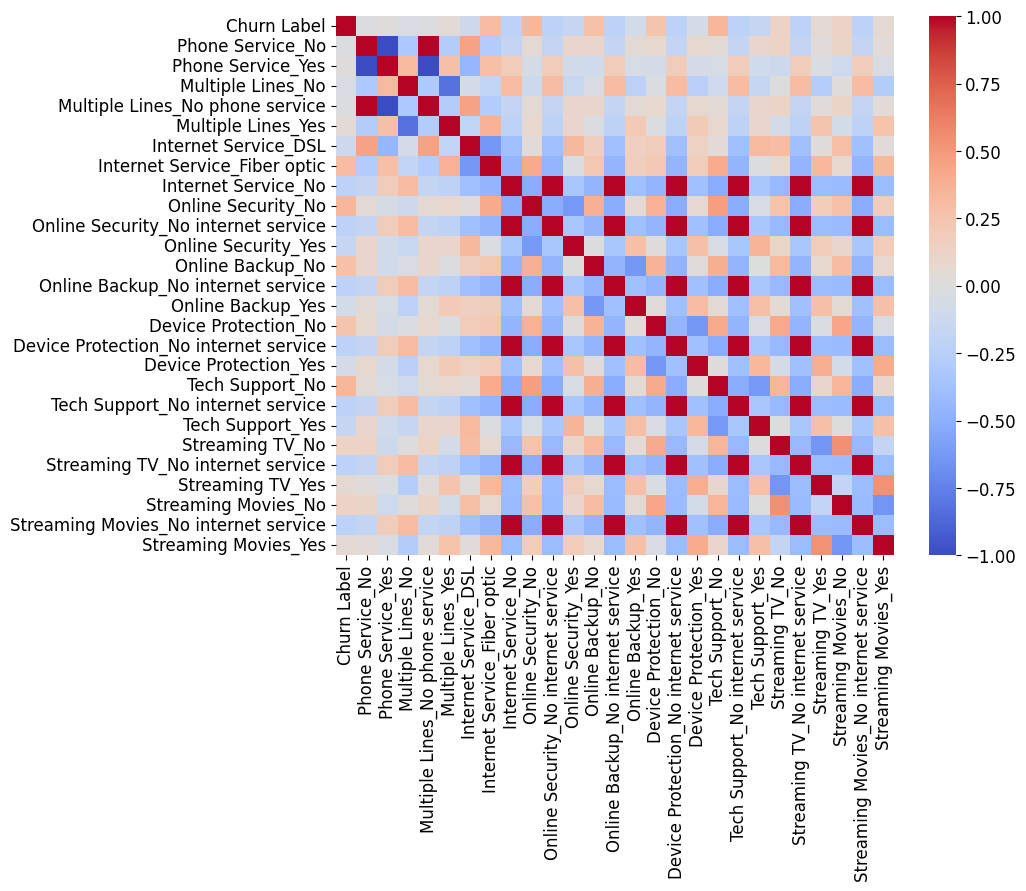

In [275]:
plt.figure(figsize=(9, 7))
sns.heatmap(df_dummies.corr(), annot=False, cmap='coolwarm')

plt.show()

In [276]:
fig = px.bar(df_dummies.corr()['Churn Label'].sort_values(ascending = False), 
             color = 'value')
fig.show()

In [277]:
# Internet Services

In [278]:
# Types of Internet services
fig = px.bar(df.groupby('Internet Service')['CustomerID'].count().reset_index(),
             x='Internet Service',
             y='CustomerID', 
             color = 'Internet Service',
             text = 'CustomerID')
fig.show()

In [279]:
# Internet services used by customers that churned
fig = px.pie(df.groupby(['Internet Service','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'Churn Label',
             names='Internet Service',
             title = 'What type of internet was connected to the clients who left the service?')
fig.show()

69% of individuals who left the service had fiber optic Internet.

Isn't fiber optic Internet superior than DSL. What's wrong?

According to Google, this Internet is more expensive and rare. We won't get into details, but 70% of those who stopped utilizing the service were fiber optic Internet users.

In [280]:
# Tech Support

In [281]:
fig = px.bar(df.groupby(['Internet Service','Tech Support','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             text = 'CustomerID',
             barmode="group",
             facet_col="Tech Support"
            )
fig.show()

In [282]:
fig = px.pie(df.groupby(['Tech Support','Churn Label'])['CustomerID'].count().reset_index(), 
             values='CustomerID', 
             facet_col = 'Churn Label',
             hole = .5,
             names='Tech Support',
             title = 'Tech support option and churn')
fig.show()

77.5% of customers that churned did not activate tech help. Additionally, active customers are evenly dispersed and there is no notable shift toward the absence of this choice.

In [283]:
# Online Security

In [284]:
fig = px.bar(df.groupby(['Internet Service','Online Security', 'Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             text = 'CustomerID',
             facet_col = 'Online Security'
            )
fig.show()

# The option reduces churn regardless of Internet type.

In [285]:
# So far:

# lowest attrition rate among customers without Internet services (fewer such customers)
# 69.2% of churn clients were linked to fiber optic Internet 
# the absence of connected technical help and online security alternatives correlated with churn

#### Payment Methods used by clients

In [286]:
fig = px.bar(df.groupby(['Payment Method','Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Payment Method", 
             color="Churn Label", 
             text = 'CustomerID'
            )
fig.show()

# Electronic check consumers have a 50% churn rate.
# Other methods generically lower!

In [287]:
# Let's see if electronic check consumers used a specific Internet service.
fig = px.bar(df.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index(),
             x='Payment Method',
             y='CustomerID', 
             facet_col = 'Internet Service',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

In [288]:
# Let's compare Internet service and payment method turnover rates:
churn_pm = df.assign(churn_clients = np.where(df['Churn Label']== 'Yes',df['CustomerID'],None))\
   .groupby(['Payment Method','Internet Service']).agg({'churn_clients':'count'}).reset_index()

In [289]:
pm_clients = df.groupby(['Payment Method','Internet Service'])['CustomerID'].count().reset_index()

In [290]:
pm_data = pm_clients.join(churn_pm.set_index(['Payment Method','Internet Service']), on=['Payment Method','Internet Service'])

In [291]:
pm_data

,Payment Method,Internet Service,CustomerID,churn_clients
0,Bank transfer (automatic),DSL,564,51
1,Bank transfer (automatic),Fiber optic,639,180
2,Bank transfer (automatic),No,330,16
3,Credit card (automatic),DSL,593,71
4,Credit card (automatic),Fiber optic,594,148
5,Credit card (automatic),No,331,9
6,Electronic check,DSL,645,204
7,Electronic check,Fiber optic,1565,819
8,Electronic check,No,122,15
9,Mailed check,DSL,607,121


In [292]:
pm_data['churn_rate,%'] = round(((pm_data['churn_clients']/pm_data['CustomerID']) * 100),2)

In [293]:
fig = px.bar(pm_data.sort_values('churn_rate,%'),
             x='churn_rate,%',
             y='Payment Method',
             facet_col = 'Internet Service',
             color = 'churn_rate,%',
             text = 'churn_rate,%')
fig.show()

For fiber optic internet, all payment methods have greater churn rates, but electronic and mailed checks have the greatest.Even for Internet DSL, these payment methods are churning more.

At this point, electronic check customers have the greatest turnover rate. All online services exhibit this tendency, but optical fiber Internet users exhibit it more.

#### Gender, Age and Other Demographics

In [294]:
# Gender
fig = px.pie(df.groupby('Gender')['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Gender',
            color_discrete_sequence=px.colors.sequential.RdBu,
            title = 'Distribution of the clients by gender')

fig.show()

In [295]:
fig = px.bar(df.groupby(['Gender',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Gender", 
             color="Churn Label", 
             text = 'CustomerID'
            )
fig.show()

In [296]:
# Not much difference in gender...

In [297]:
# Age - Senior Citizen?
fig = px.pie(df.groupby(['Senior Citizen','Churn Label'])['CustomerID'].count().reset_index(), 
            values='CustomerID', 
            names='Churn Label',
            facet_col = 'Senior Citizen',
            color = 'Churn Label',
            title = 'Churn rate by customer age')

fig.show()

# Seniors churn approximately twice as much as non-seniors. However, such customers are rarer.

In [298]:
df.groupby('Senior Citizen')['CustomerID'].count()

Senior Citizen
No     5852
Yes    1132
Name: CustomerID, dtype: int64

In [299]:
# Partners or Dependents
fig = px.bar(df.groupby(['Senior Citizen','Partner', 'Dependents','Churn Label'])['CustomerID'].count().reset_index(),
             x="Senior Citizen",
             y="CustomerID", 
             color="Churn Label", 
             #barmode="group",
             facet_row="Partner",
             facet_col = 'Dependents'
            )
fig.show()

# Seniors without partners and dependents have a nearly 50% churn rate.
# Summarize and develop a churn prediction model after seeing which services seniors used.

In [300]:
fig = px.bar(df.groupby(['Senior Citizen','Internet Service','Churn Label'])['CustomerID'].count().reset_index(),
             x="Internet Service",
             y="CustomerID", 
             color="Churn Label", 
             barmode="group",
             facet_col = 'Senior Citizen'
            )
fig.show()

# The biggest churn rate is among seniors, who were more likely to use optical fiber Internet.

# Analyzing the data taught us:
   # The lowest churn rate among customers without Internet services (but there are fewer such customers) 
   # 69.2% of the clients in the churn were connected to the fiber optic Internet 
   # The absence of connected technical support and online security options correlates with the churn variable 
   # The highest churn rate is for customers with an electronic check, regardless of the type of Internet services

### 3.  Preparing Data for Model
#### A.  Deleting the Columns -- Not to use!

In [301]:
df = df.drop(['Country','State','Count','Zip Code','Churn Reason','City','Churn Score','Churn Value','CLTV','CustomerID','Lat Long',
                  'Latitude','Longitude'], axis = 1)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6984 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             6984 non-null   object 
 1   Senior Citizen     6984 non-null   object 
 2   Partner            6984 non-null   object 
 3   Dependents         6984 non-null   object 
 4   Tenure Months      6984 non-null   int64  
 5   Phone Service      6984 non-null   object 
 6   Multiple Lines     6984 non-null   object 
 7   Internet Service   6984 non-null   object 
 8   Online Security    6984 non-null   object 
 9   Online Backup      6984 non-null   object 
 10  Device Protection  6984 non-null   object 
 11  Tech Support       6984 non-null   object 
 12  Streaming TV       6984 non-null   object 
 13  Streaming Movies   6984 non-null   object 
 14  Contract           6984 non-null   object 
 15  Paperless Billing  6984 non-null   object 
 16  Payment Method     6984 non-n

#### B.  Encoding Categorical Variables

In [303]:
df['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [304]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [305]:
df = df.apply(lambda x: encode_data(x))
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label
0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,1,0,0,1,49,1,2,1,0,2,2,0,2,2,0,1,0,103.70,5036.30,1
5,0,0,1,0,10,1,0,0,0,0,2,2,0,0,0,0,1,55.20,528.35,1
6,1,1,0,0,1,0,1,0,0,0,2,0,0,2,0,1,2,39.65,39.65,1
7,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,0,3,20.15,20.15,1


In [306]:
# Let's check correlation
fig = px.bar(df.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

#### C.  Scaling Data

In [307]:
# Using Min and Max

# define min max scaler
scaler = MinMaxScaler()

# transform data
data1 = df
scaled = scaler.fit_transform(data1)
print(scaled)

[[1.         0.         0.         ... 0.35422886 0.01245279 1.        ]
 [1.         0.         0.         ... 0.85024876 0.57989821 1.        ]
 [0.         0.         1.         ... 0.36766169 0.06083617 1.        ]
 ...
 [0.         0.         1.         ... 0.84527363 0.84779154 0.        ]
 [0.         0.         1.         ... 0.11293532 0.03989153 0.        ]
 [1.         0.         0.         ... 0.86965174 0.78810105 0.        ]]


In [308]:
# Using Standardization

# define standard scaler
scaler = StandardScaler()

# transform data
data2 = df
scaled2 = scaler.fit_transform(data2)
print(scaled2)

[[ 0.99059406 -0.43981603 -0.96786985 ... -0.35881741 -0.95967903
   1.6907287 ]
 [ 0.99059406 -0.43981603 -0.96786985 ...  1.29608855  1.21187014
   1.6907287 ]
 [-1.00949525 -0.43981603  1.03319677 ... -0.31400049 -0.77452132
   1.6907287 ]
 ...
 [-1.00949525 -0.43981603  1.03319677 ...  1.27948969  2.23706749
  -0.59146095]
 [-1.00949525 -0.43981603  1.03319677 ... -1.16386193 -0.85467407
  -0.59146095]
 [ 0.99059406 -0.43981603 -0.96786985 ...  1.36082409  2.00863875
  -0.59146095]]


In [309]:
# Additional Data pre processing
# Binning based on quantiles, binning total charges reduces metrics so was removed
num_bins = 5

df['Tenure Quantiles'] = pd.qcut(df['Tenure Months'], q=num_bins, labels=False)

# Printing the quantiles
print("Quantile Ranges for Tenure Months:",pd.qcut(df['Tenure Months'], q=num_bins).unique())

# Droping original columns and making dummies as these are ordinal variables now
df.drop(['Tenure Months'], axis=1, inplace=True) 

Quantile Ranges for Tenure Months: [(-0.001, 6.0], (40.0, 61.0], (6.0, 20.0], (20.0, 40.0], (61.0, 72.0]]
Categories (5, interval[float64, right]): [(-0.001, 6.0] < (6.0, 20.0] < (20.0, 40.0] < (40.0, 61.0] < (61.0, 72.0]]


In [310]:
# Basic outlier detection using z-score
z_scores = stats.zscore(df)
threshold = 4
z_scores_total_charges = stats.zscore(df['Total Charges'])
df['Total Charges Outlier'] = np.where(np.abs(z_scores_total_charges) > threshold, 1, 0)

#### D.  Balancing Data

**SMOTE** algorithmically oversamples the minority class in an imbalanced dataset for binary classification. **SMOTE** synthesizes minority samples. It finds its k-nearest neighbors in feature space by selecting a minority class sample. Interpolating between the selected sample and its k-nearest neighbors yields synthetic samples. **SMOTE** generates new samples by randomly selecting one of the k-nearest neighbors and computing the difference between it and the original sample. This difference is multiplied by a random value between 0 and 1 and added to the original sample to form the synthetic sample.

In [311]:
df.groupby('Churn Label')['Churn Label'].count()

Churn Label
0    5174
1    1810
Name: Churn Label, dtype: int64

In [312]:
#Strategy is 1 - Because we want to oversampling from "Churn - Class 1"
over = SMOTE(sampling_strategy = 1)

x = df.drop("Churn Label", axis = 1).values
y = df['Churn Label'].values

In [313]:
# x,y = over.fit_resample(x,y)

### 4.  Training and Testing 

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)

In [315]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)
    
    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)
    
    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    
    # Plot confusion matrix with labeled counts and percentages
    plt.figure(figsize=(10, 7))
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()
    
    # Evaluate model performance and print results
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

In [318]:
# Diffrent clasifiers
classifiers = {
    "XGBClassifier": XGBClassifier(learning_rate=0.01, max_depth=4, n_estimators=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100),
    "GradientBoostingClassifier": GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3
    ),
    "LGBMClassifier": LGBMClassifier(
        learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42
    ),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=100),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(max_iter=1000),
    "Ensemble_ADA_LR_GB": VotingClassifier(
        estimators=[
            ("ada", AdaBoostClassifier(n_estimators=100)),
            ("lr", LogisticRegression(max_iter=1000)),
            (
                "gb",
                GradientBoostingClassifier(
                    n_estimators=100, learning_rate=0.1, max_depth=3
                ),
            ),
        ],
        voting="hard",
    ),  
}

Evaluating XGBClassifier


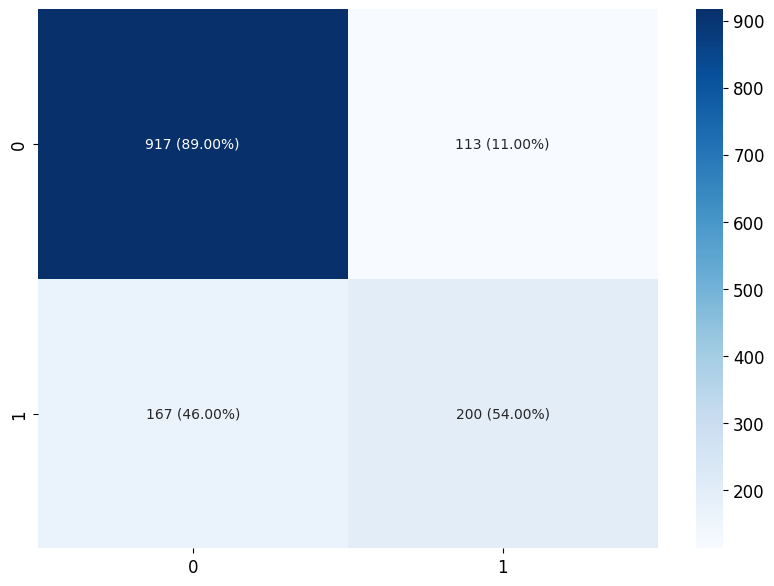

ROC AUC:  71.76%
Model accuracy:  79.96%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1030
           1       0.64      0.54      0.59       367

    accuracy                           0.80      1397
   macro avg       0.74      0.72      0.73      1397
weighted avg       0.79      0.80      0.79      1397

Evaluating RandomForestClassifier


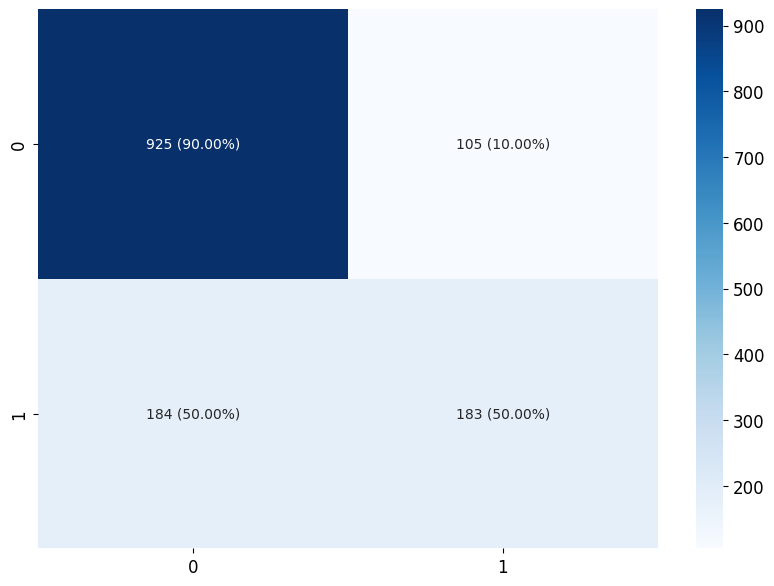

ROC AUC:  69.83%
Model accuracy:  79.31%
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1030
           1       0.64      0.50      0.56       367

    accuracy                           0.79      1397
   macro avg       0.73      0.70      0.71      1397
weighted avg       0.78      0.79      0.78      1397

Evaluating GradientBoostingClassifier


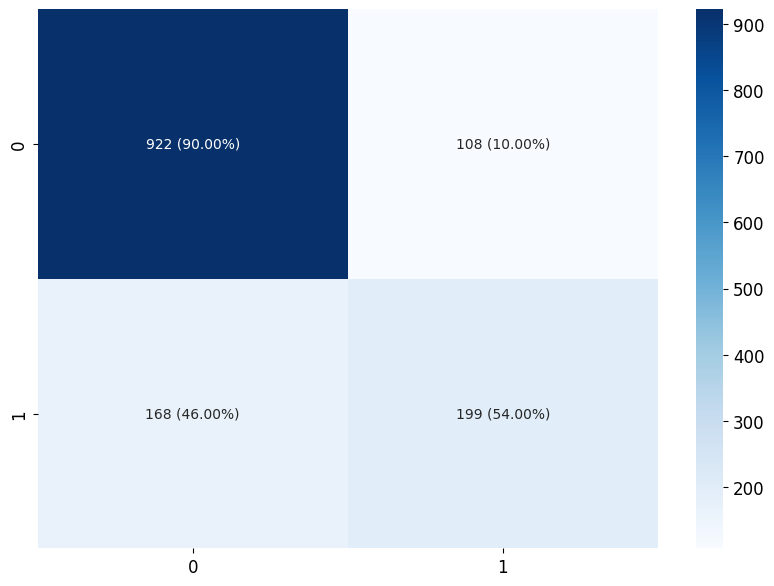

ROC AUC:  71.87%
Model accuracy:  80.24%
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1030
           1       0.65      0.54      0.59       367

    accuracy                           0.80      1397
   macro avg       0.75      0.72      0.73      1397
weighted avg       0.79      0.80      0.80      1397

Evaluating LGBMClassifier
[LightGBM] [Info] Number of positive: 1443, number of negative: 4144
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 5587, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258278 -> initscore=-1.054937
[LightGBM] [Info] Start training from score -1.054937
[LightGBM] [Warning] No further splits with positive

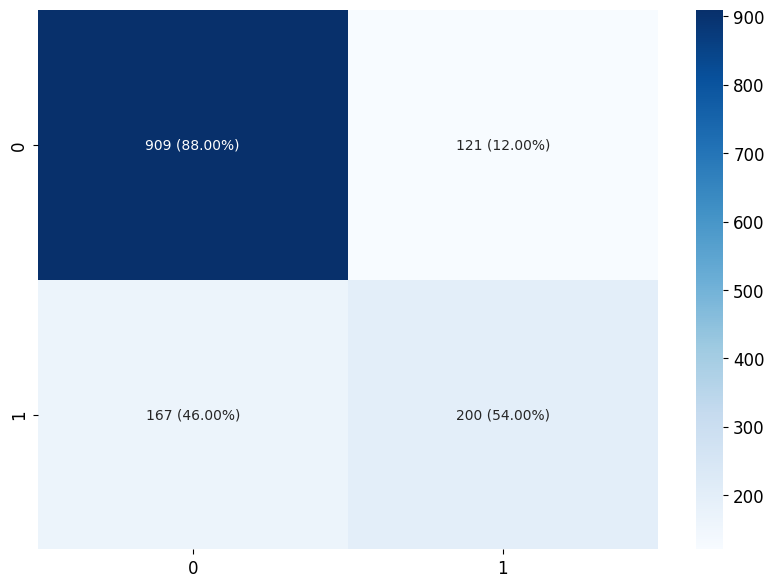

ROC AUC:  71.37%
Model accuracy:  79.38%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.62      0.54      0.58       367

    accuracy                           0.79      1397
   macro avg       0.73      0.71      0.72      1397
weighted avg       0.79      0.79      0.79      1397

Evaluating LogisticRegression


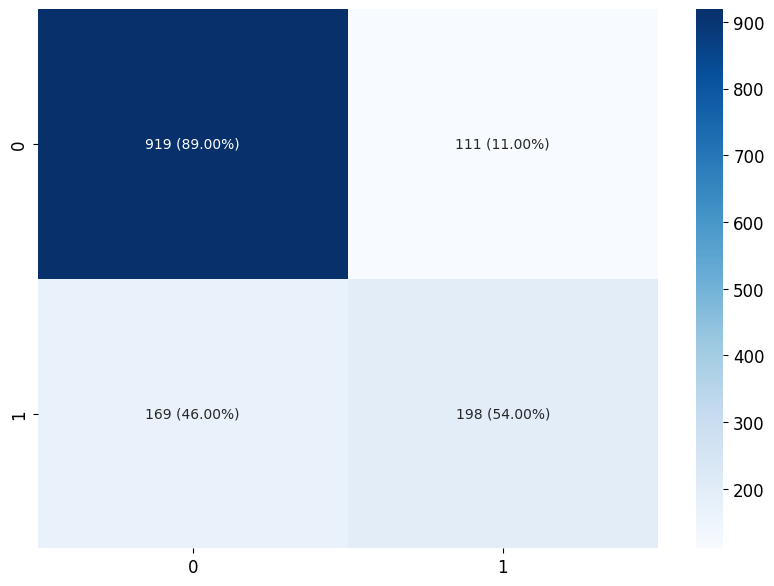

ROC AUC:  71.59%
Model accuracy:  79.96%
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1030
           1       0.64      0.54      0.59       367

    accuracy                           0.80      1397
   macro avg       0.74      0.72      0.73      1397
weighted avg       0.79      0.80      0.79      1397

Evaluating SVC


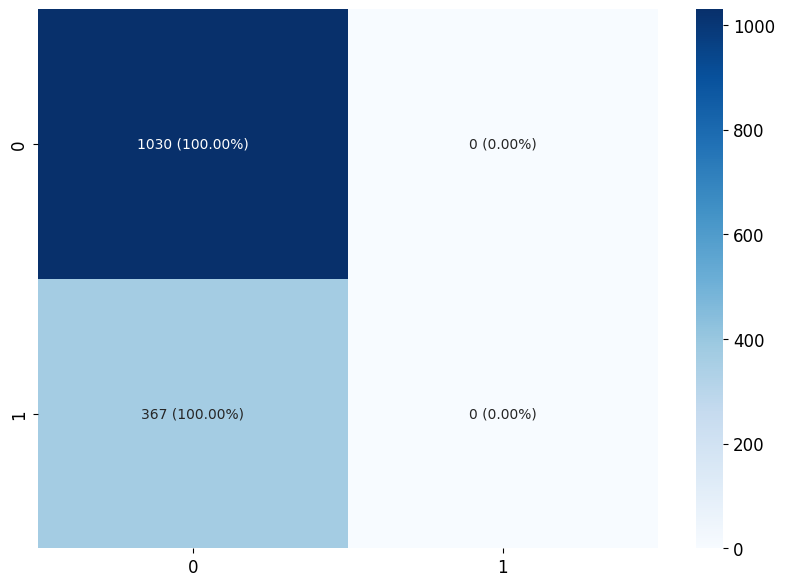

ROC AUC:  50.00%
Model accuracy:  73.73%
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1030
           1       0.00      0.00      0.00       367

    accuracy                           0.74      1397
   macro avg       0.37      0.50      0.42      1397
weighted avg       0.54      0.74      0.63      1397

Evaluating KNeighborsClassifier


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



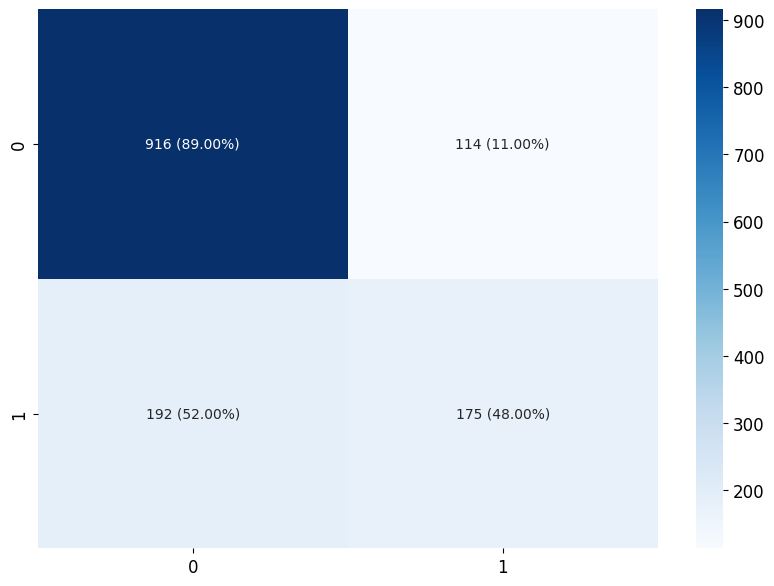

ROC AUC:  68.31%
Model accuracy:  78.10%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1030
           1       0.61      0.48      0.53       367

    accuracy                           0.78      1397
   macro avg       0.72      0.68      0.70      1397
weighted avg       0.77      0.78      0.77      1397

Evaluating AdaBoostClassifier


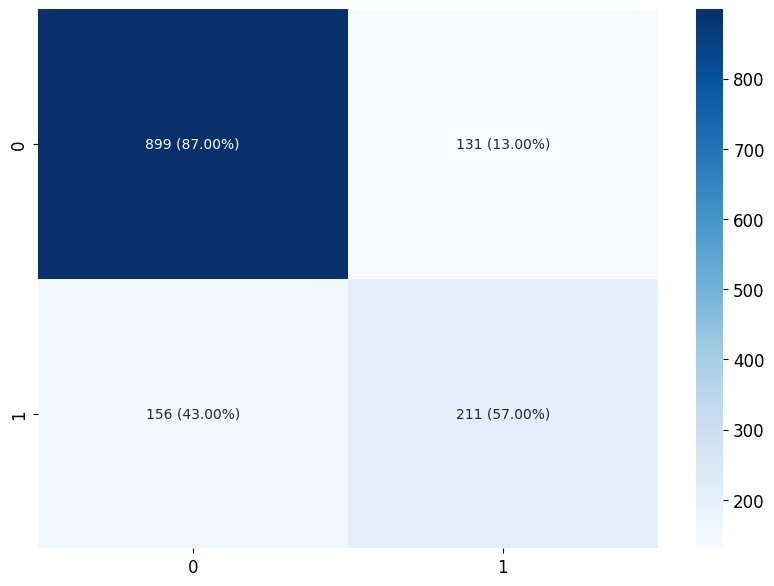

ROC AUC:  72.39%
Model accuracy:  79.46%
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1030
           1       0.62      0.57      0.60       367

    accuracy                           0.79      1397
   macro avg       0.73      0.72      0.73      1397
weighted avg       0.79      0.79      0.79      1397

Evaluating HistGradientBoostingClassifier


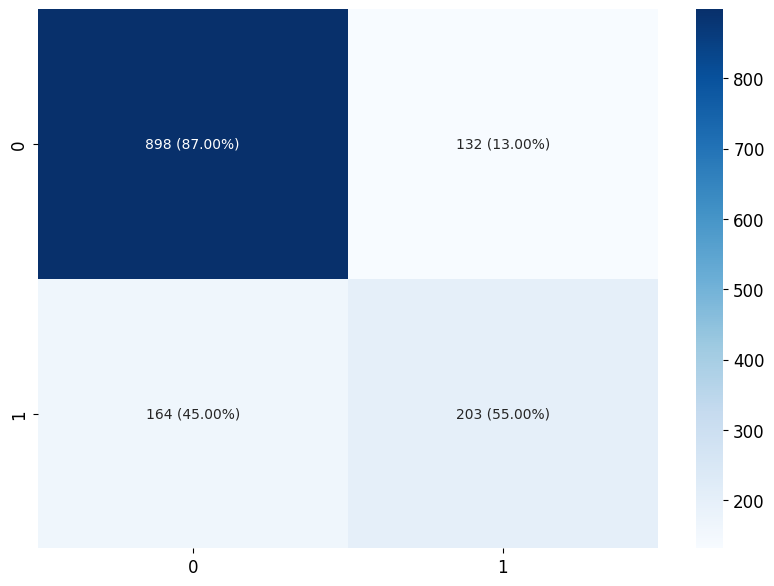

ROC AUC:  71.25%
Model accuracy:  78.81%
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1030
           1       0.61      0.55      0.58       367

    accuracy                           0.79      1397
   macro avg       0.73      0.71      0.72      1397
weighted avg       0.78      0.79      0.78      1397

Evaluating Ensemble_ADA_LR_GB


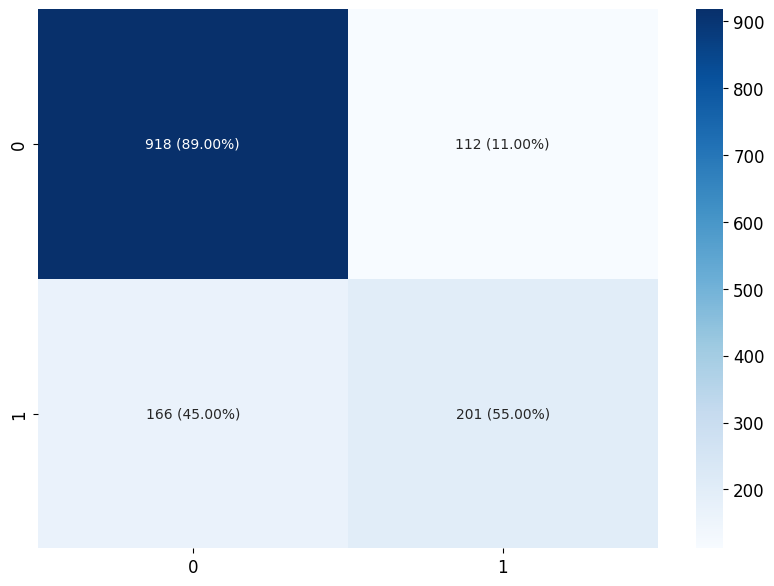

ROC AUC:  71.95%
Model accuracy:  80.10%
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1030
           1       0.64      0.55      0.59       367

    accuracy                           0.80      1397
   macro avg       0.74      0.72      0.73      1397
weighted avg       0.79      0.80      0.80      1397



In [319]:
# Confusion Matrix: TN/FP // FN/TP
# Precision: TP / (TP+FP)
# Recall: TP / (TP+FN)
# F1: 2* ( (Precision * Recall) / (Precision + Recall) )
# Support: It indicates the number of examples of each particular class in the true responses (responses in your test set).

for name, clf in classifiers.items():
    print(f"Evaluating {name}")
    model(clf, x_train, y_train, x_test, y_test)


**3. SOURCE:**
https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset 
https://www.kaggle.com/code/hely333/customer-churn-eda-prediction-f1-score-87/notebook